# Proyecto 1 Deteccion Titanic

### Importación de Librerías de Preprocesamiento

In [107]:
import numpy as np #libreria calculos de algebra lineal
import pandas as pd  #libreria para hacer dataframes y preprocesar columnas y datos
import matplotlib.pyplot as plt #libreria para graficar
import seaborn as sns #visualizacion de estadisticas
sns.set()
%matplotlib inline



### Carga de datasets a dataframes

In [108]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#junto ambos dataframes en uno solo. Para aplicar las mismas modificaciones en ambos y luego cuando hacemos la red neuronal los volvemos a separar.
df = pd.concat([train,test], ignore_index = True)

#ver dimensiones y columnas
print(train.shape, test.shape, train.columns.values)

(891, 12) (418, 11) ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## Estudio de los datos


In [109]:
train.head(10) #muestro los diez primeros datos del dataset train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [110]:
test.head(10)  #muestro los diez primeros datos del dataset test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


La diferencia entre el dataset train y el test, es que el test no incluye la columna survived ya que va ser usado para ser predecido posteriormente, por lo cual, el dataset train cuenta con 12 columnas, mientras que el dataset test con 11 columnas. Al juntar los dos dataset en uno solo. Las columnas de test de survived quedarian nulas.

In [111]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Informacion de los tipos de datos

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Cantidad de datos nulos

In [113]:
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [114]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Podemos ver que el campo edad tiene valores nulos. De 891 filas, 714 hay datos y 177 son nulas. También de manera similar el campo cabina hay solo 204 datos y 687 se perdieron. Y en embarques solo hay 2 datos nulos. Por lo cual se va a modificar el dataframe para cubrir esos campos nulos.

## Gráficas: Nos va a permitir ver las relaciones de varibles vs Supervivencia

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots



In [116]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df2 = pd.DataFrame([survived,dead])
    df2.index = ['Survived','Dead']
    df2.plot(kind='bar',stacked=True, figsize=(10,5))

### Varible Sexo

In [117]:
# Se mapea a una variable booleana, si es hombre o mujer, no hizo falta usarla como categorica.
df.Sex = df.Sex.map({'male':0, 'female':1})

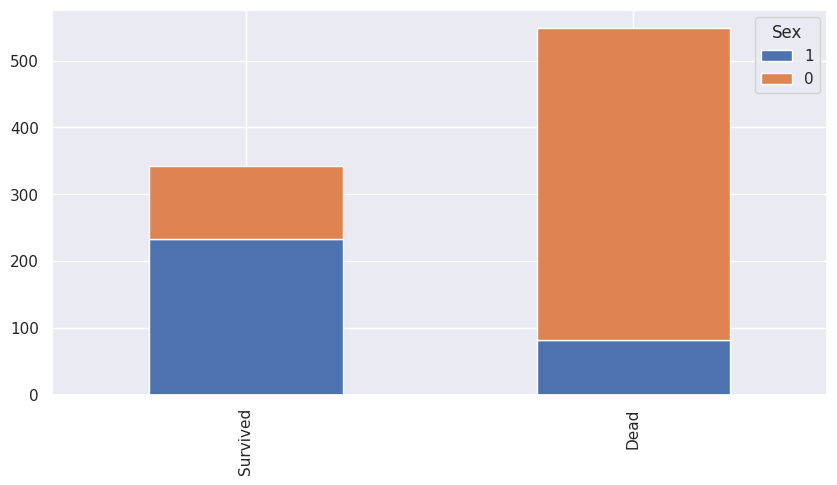

In [118]:
bar_chart('Sex') #Graficar sexo vs supervivencia.

Se puede ver que murieron mas hombres, pero sobrevivieron más mujeres. Input importante en la red

### Variable Pclass (1ra, 2da o 3ra clase del barco)

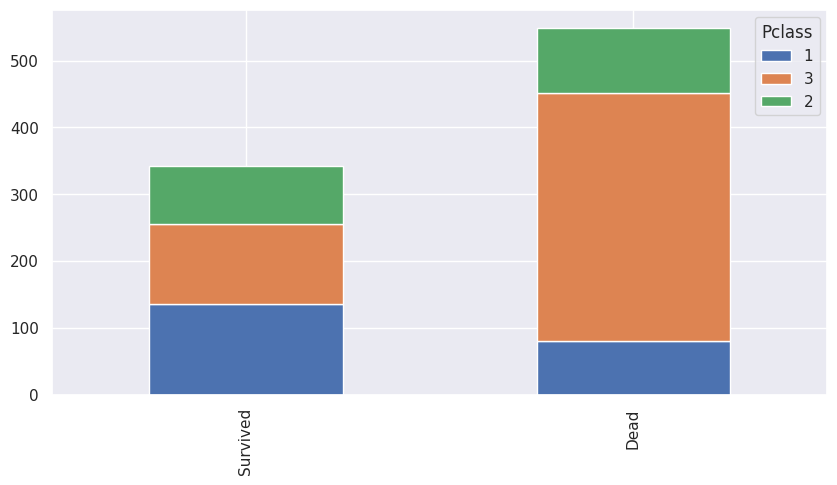

In [119]:
bar_chart('Pclass')

In [120]:
# Agrupo por media la Supervivencia y la Clase de la persona
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Se puede ver que la clase 1 es la que mayor probabilidad tiene de sobrevivir, pero la clase 3 fue la que mas muriò tambièn, este es un dato muy importante que vamos a usar después. Al final hago el one hot encoding, si lo hago ahorita pierdo la variable Pclass.

## Extraer el titulo de los nombres

Cada nombre tiene un título, que es claramente lo que importa, ya que contiene información del status. Extrajimos los títulos de estos nombres.


In [121]:
df.Name.head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


Existía la problematica que en el test existian títulos que no habian en el dataset de train, pero esto se resolvió al pegarlo todo en un solo dataframe

In [122]:
#los títulos siempre se encuentran entre uba coma y un punto, buscamos los strings entre esos dos y lo guardamos en una nueva columna llamada Title.
df['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

# inspect the amount of people for each title
df['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Mlle,2
Major,2


los principales títulos con mayor cantidad de datos son Master, Miss, Mr, Mrs. Algunos de los otros se pueden combinar en algunas de estas cuatro categorías. Por lo demás, los llamamamos Others.

In [123]:
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss')
             & (df.Title !=  'Mrs')] = 'Others'

# correlacion del titulo con los sobrevivientes
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

<ipython-input-123-6cd11e292cbb>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss')
<ipython-input-123-6cd11e292cbb>:3: SettingWithCopyWarning: 
A value is try

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


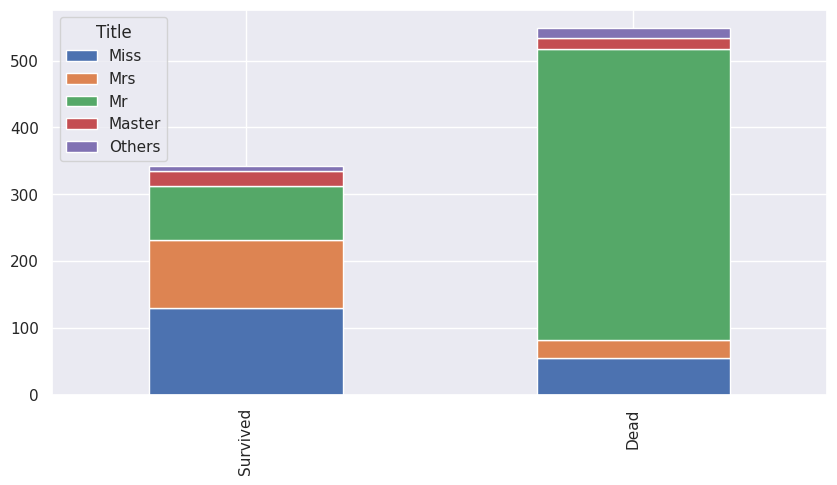

In [124]:
bar_chart('Title') #En la grafica se ve mejor que los Mr fueron los que mas murieron, pero los miss y mrs fueron los que mas sobrevivieron tambien

In [125]:
df['Title'].value_counts() #Contar numero de filas con los titulos

,count
Title,
Mr,757
Miss,262
Mrs,201
Master,61
Others,28


In [126]:
df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1) #One hot enconding con las columnas

In [127]:
df.head() #Ver cambios en el dataframe

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Others
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,False,True,False,False
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,False,False,True,False
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,True,False,False,False
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,False,False,False,True,False
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,False,False,True,False,False


### Variable Familia: Uniendo Hermanos o Pareja e Hijos o Padres (SipSp y Parch)

In [128]:
# Para crear una familia creo una nueva columna con los datos de los hermanos/esposos y padres/hijos mas la persona
df['Family'] = df['SibSp'] + df['Parch'] + 1

In [129]:
df.head() # ver la familia en el dataset

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Others,Family
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False,False,True,False,False,2
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,False,False,False,True,False,2
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False,True,False,False,False,1
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,Mrs,False,False,False,True,False,2
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,Mr,False,False,True,False,False,1


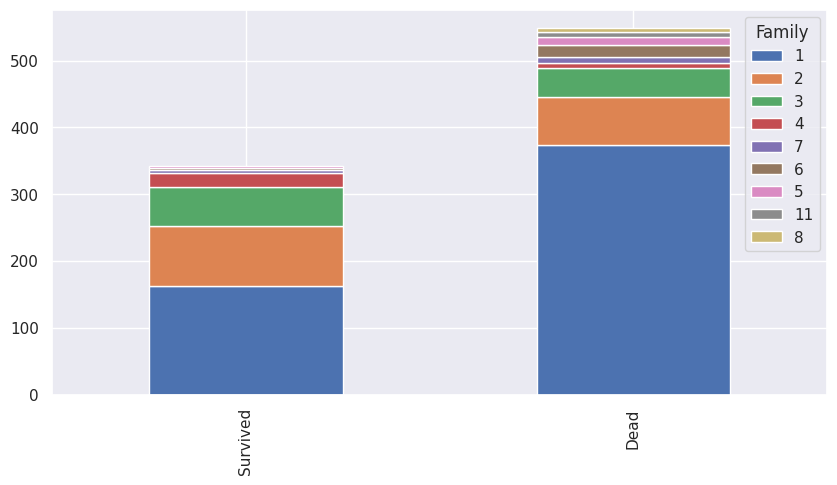

In [130]:
bar_chart('Family')

In [131]:
# inspect the amount of people for each Family size
df['Family'].value_counts()

,count
Family,
1,790
2,235
3,159
4,43
6,25
5,22
7,16
11,11
8,8


Podemos ver que la cantidad de personas en las familias grandes de 7,6,11 integrantes es mucho menor que en las familias pequeñas de 2 o 3 integrantes por ejemplo. Por lo cual no vale la pena tener tantas variables categoricas y combinamos todos los datos con Familia de 4 o mayor en una categoría. Dado que las personas en familias grandes tienen una tasa de supervivencia aún más baja que las que están solas, decidimos mapear los datos con Familia mayor a 4 a Familia = 0.

In [132]:
df.Family = df.Family.map(lambda x: 0 if x > 4 else x)
#Correlacion y media de familiariees que sobrevivieron por cantidad de familiares
df[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.161290
1,1,0.303538
2,2,0.552795
3,3,0.578431
4,4,0.724138


In [133]:
df['Family'].value_counts()

,count
Family,
1,790
2,235
3,159
0,82
4,43


In [134]:
df.Family.head(10) #ver dataset con la cantidad de miembros en las familias

,Family
0,2
1,2
2,1
3,2
4,1
5,1
6,1
7,0
8,3
9,2


### Variable Ticket

In [135]:
df.Ticket.head(20)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


Hay dos tipos de tickets como se puede ver los que son puro numero y los que comienzan por letras y luego numeros.
Investigamos y conseguimos que los nombres de los boletos con letras  representan algunas clases especiales del barco. Para los números, la mayoría de los boletos tienen su primer dígito = 1, 2 o 3, que probablemente también representan diferentes clases. Así que solo conservo el primer elemento (una letra o un número de un solo dígito)

In [136]:
df.Ticket = df.Ticket.map(lambda x: x[0])

# Ver la correlacion entre ticket y supervivencia, tambien lo vemos en la grafica
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [137]:
# Ver la cantidad de personas por cada tipo de entrada
df['Ticket'].value_counts()

,count
Ticket,
3,429
2,278
1,210
P,98
S,98
C,77
A,42
W,19
7,13



Los tickes con mas personas son los tickets que comienzan por 1,2,3
También en la gráfica y la correlación se ve una alta tasa de sobrevivencia en los tickets que comienzan por 1,2,3.
Tambien los tickets que comienzan por 9, C, F, P y S tienen probabilidad significativa de sobrevivir. Pero 9 tiene solo 2 personas y F tiene 13 personas, no es significativa esa muestra. Entonces para entender bien como se comparta el precio, luego evaluamos la relación que tiene con el precio y con la clase. Que siempre va ser dependientes.


In [138]:
# la media y correlacion del precio por cada tipo de tickets
df[['Ticket', 'Fare']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Fare
0,1,65.771211
1,2,20.235194
2,3,15.380682
3,4,16.764036
4,5,19.262500
5,6,19.153711
6,7,9.197438
7,8,8.397900
8,9,7.750000
9,A,10.189681


In [139]:
#la media  y correlacion de la clase si es 1,2 o 3 por cada tipo de tickets
df[['Ticket', 'Pclass']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Pclass
0,1,1.147619
1,2,2.309353
2,3,2.904429
3,4,3.000000
4,5,2.333333
5,6,2.111111
6,7,3.000000
7,8,3.000000
8,9,3.000000
9,A,3.000000


existen relaciones de la letra y numero del boleto inicial con la clase del barco y si es boleto caro o barato. Asi que el ticket es una caracteristica muy util, que la vamos a acomodar al final en intervalos

### Variable Fare o Precio

In [140]:
# revisar si tiene valores nulos el precio
df.Fare.isnull().sum(axis=0)

1

Para calcular ese valor, lo podemos sacar del ticket, la clase, donde embarco, o la cabina. Veamos los valores de ellas.

In [141]:
# revisar cual ticket tiene ese precio nulo
df.Ticket[df.Fare.isnull()]

,Ticket
1043,3


In [142]:
# revisar cual clase tienen ese precio nulo
df.Pclass[df.Fare.isnull()]

,Pclass
1043,3


In [143]:
# revisar cual cabinas tienen ese precio nulo
df.Cabin[df.Fare.isnull()]

,Cabin
1043,NaN


In [144]:
# revisar cual embarque tienen ese precio nulo
df.Embarked[df.Fare.isnull()]

,Embarked
1043,S


 No hay un valor correspondiente para Cabin, así que vimos la relación entre Fare y las tres características ticket, pclass y embarked.Fare tiene correlación con estas tres características. Se adivino el valor faltante utilizando la media de (Pcalss = 3) & (Ticket = 3) & (Embarked = S)

In [145]:
#con loc puedo hacer la consula de los datos que necesito y le pongo la media
adivinarFare = df.Fare.loc[ (df.Ticket == '3') & (df.Pclass == 3) & (df.Embarked == 'S')].median()
df.Fare.fillna(adivinarFare , inplace=True)

<ipython-input-145-f235e429677b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Fare.fillna(adivinarFare , inplace=True)


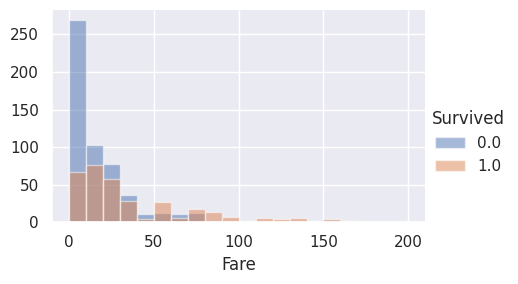

In [146]:
# visualize los precios por las personas que murieron y sobrevivieron
grid = sns.FacetGrid(df, hue='Survived', aspect=1.5)
grid.map(plt.hist, 'Fare', alpha=.5, bins=range(0,210,10))
grid.add_legend()
plt.show()

Podemos ver que las personas con tarifas más bajas tienen menos probabilidades de sobrevivir. P. La forma ideal es pasarlo a la red neuronal con intervalos de tarifa. Ya que si lo pasamos asi como esta a la red causaria un ajuste excesivo

In [147]:
# Dividir los precios en 5 intervalos
df['Fare-intervalo'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

# Calcular la media entre los sobrevientes por cada intervalo de precio
df[['Fare-intervalo', 'Survived']].groupby(['Fare-intervalo'], as_index=False).mean()

,Fare-intervalo,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


In [148]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Others,Family,Fare-intervalo
0,1,0.0,3,0,22.0,1,0,A,7.2500,NaN,S,Mr,False,False,True,False,False,2,1
1,2,1.0,1,1,38.0,1,0,P,71.2833,C85,C,Mrs,False,False,False,True,False,2,5
2,3,1.0,3,1,26.0,0,0,S,7.9250,NaN,S,Miss,False,True,False,False,False,1,2
3,4,1.0,1,1,35.0,1,0,1,53.1000,C123,S,Mrs,False,False,False,True,False,2,5
4,5,0.0,3,0,35.0,0,0,3,8.0500,NaN,S,Mr,False,False,True,False,False,1,2


### Variable Cabina o Cabin

#Como cabina tiene tantos datos nulos, para esta entrega no tomamos en cuenta esa variable, ya que sacar un promedio con los pocos datos que hay puede afectar el resultado.Si la entrega se extiende podemos añadirle al modelo estos datos de cabina.

In [149]:
#df = df.drop(labels=['Cabin'], axis=1)

In [150]:
df.Cabin.isnull().sum(axis=0)

1014

Tenemos 1014 valores de null

In [151]:
df.Cabin.value_counts()

,count
Cabin,
C23 C25 C27,6
G6,5
B57 B59 B63 B66,5
C22 C26,4
F33,4
...,...
A14,1
E63,1
E12,1


In [152]:
train_test_data = [df]
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

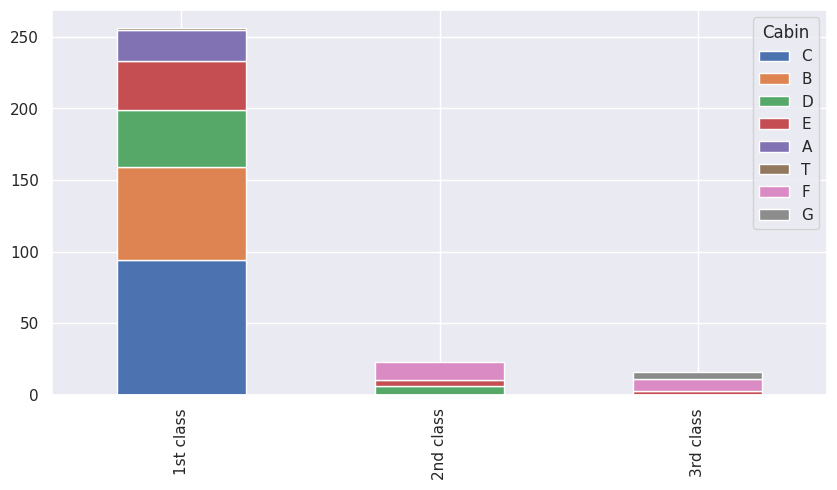

In [153]:
Pclass1 = df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = df[df['Pclass']==3]['Cabin'].value_counts()
df2 = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df2.index = ['1st class','2nd class', '3rd class']
df2.plot(kind='bar',stacked=True, figsize=(10,5))

In [154]:
#Se procedio a mapear las categorias a una variable numerica y luego hacemos one hot encoding de ellas.
mapeo = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(mapeo)

In [155]:
#Para los valores null, se utilzo los promedios de cada clase para las cabinas faltantes
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


<ipython-input-155-480b4cb1139d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)


In [156]:
df.Cabin

,Cabin
0,6.0
1,3.0
2,6.0
3,3.0
4,6.0
...,...
1304,6.0
1305,3.0
1306,6.0
1307,6.0


In [157]:
df.Cabin.isnull().sum(axis=0)

0

### Variable Embarque Embarked

In [158]:
# ver si hay valores nulos, hay 2 nulos
df.Embarked.isnull().sum(axis=0)

2

In [159]:
df.describe(include=['O']) # S is es el embarque mas comun

,Ticket,Embarked,Title
count,1309,1307,1309
unique,16,3,5
top,3,S,Mr
freq,429,914,757


In [160]:
# Voy a llenar los Valores nulos con S, que es el mas comun
df.Embarked.fillna('S' , inplace=True )

<ipython-input-160-6ef34af3cff4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked.fillna('S' , inplace=True )


In [161]:
# ver la media y correlacion entre embarque y supervivencia y la clase, precio, edad y sexo
df[['Embarked', 'Survived','Pclass','Fare', 'Age', 'Sex']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived,Pclass,Fare,Age,Sex
0,C,0.553571,1.851852,62.336267,32.332170,0.418519
1,Q,0.389610,2.894309,12.409012,28.630000,0.487805
2,S,0.339009,2.344978,27.512485,29.298151,0.319869


La tasa de supervivencia cambia entre los diferentes valores de Embarked. Sin embargo, se debe a los cambios las otras caracteristicas que ya evaluamos Por ejemplo, las personas de Embarked = C tienen más probabilidades de sobrevivir porque generalmente son más ricas (Pclass, Fare). Las personas de Embarked = S tienen la tasa de supervivencia más baja porque tienen la fracción más baja de pasajeros mujeres, aunque son un poco más ricas que las personas de Embarked = Q. Por lo tanto, decidímos quitar esta característica también.

<Axes: >

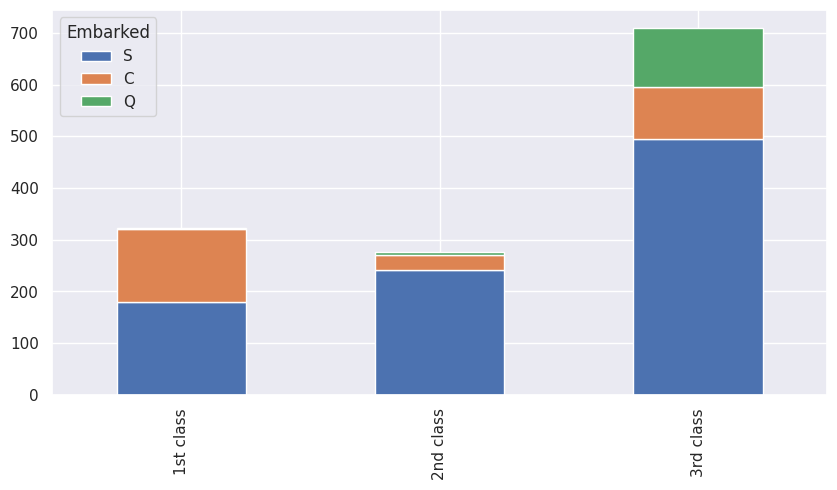

In [162]:
Pclass1 = df[df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass']==3]['Embarked'].value_counts()
df3 = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df3.index = ['1st class','2nd class', '3rd class']
df3.plot(kind='bar',stacked=True, figsize=(10,5))

## Variable Edad/Age

In [163]:
df.Age.isnull().sum(axis=0)

263

Hay 263 valores nulos.La edad probablemente se puede inferir de otras características como Título, Tarifa, SibSp, Parch.

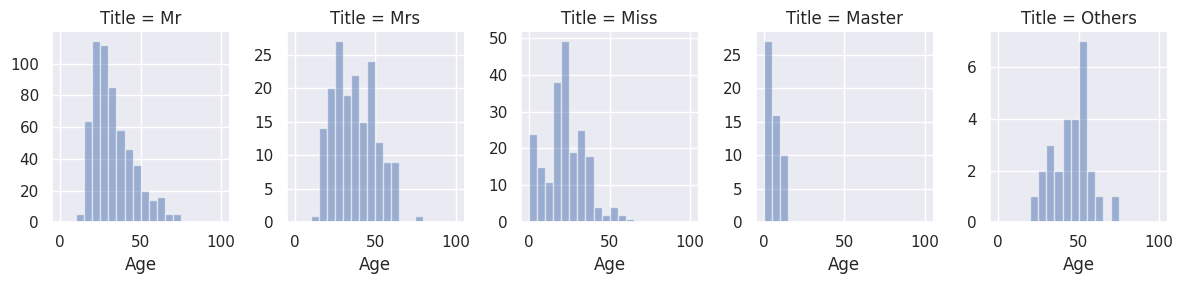

In [164]:
# Ver la correlacion de la edad con los titulos
grid = sns.FacetGrid(df, col='Title', aspect=0.8, sharey=False)
grid.map(plt.hist, 'Age', alpha=.5, bins=range(0,105,5))
plt.show()

In [165]:
# inspect the mean Age for each Title
df[['Title', 'Age']].groupby(['Title']).mean()

,Age
Title,
Master,5.482642
Miss,21.795236
Mr,32.252151
Mrs,36.930636
Others,45.074074


El cambio de Age como función de Title  es bastante significativo, los valores nulos los llenamos con la media de la edad de los titulos each title (Mr, Mrs, Miss, Master, Others)

In [166]:
# los valores nulos los llenamos con la media de la edad de los titulos each title (Mr, Mrs, Miss, Master, Others)
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)

<ipython-input-166-f6f96aa8bcd7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace=True)


In [167]:
df.head(30)
df.groupby("Title")["Age"].transform("median")

,Age
0,29.0
1,35.0
2,22.0
3,35.0
4,29.0
...,...
1304,29.0
1305,47.0
1306,29.0
1307,29.0


In [168]:
df.Age.isnull().sum(axis=0) #ya no tengo variables nulas en la edad

0

todavía tenemos que agrupar los datos en diferentes intervalos de edad, por el mismo motivo que Fare

In [169]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # Edades
age_index = (1,2,3,4,5,6,7)  # ('bebe','nino','adolescente','joven','adulto','mayor','3raedad')
df['Age-intervalo'] = pd.cut(df.Age, bins, labels=age_index).astype(int)

#ver la correlacion si sobrevivio con los intervalos de edad
df[['Age-intervalo', 'Survived']].groupby(['Age-intervalo'],as_index=False).mean()

,Age-intervalo,Survived
0,1,0.659091
1,2,0.448276
2,3,0.428571
3,4,0.310588
4,5,0.447876
5,6,0.375000
6,7,0.125000


## Ticket final

In [170]:
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [171]:
df['Ticket'].value_counts()

,count
Ticket,
3,429
2,278
1,210
P,98
S,98
C,77
A,42
W,19
7,13



Las categorías principales de Ticket son 1, 2, 3, P, S y C, así que combinamos todas las demás en 4

In [172]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# ver la media y correlacion con el cambio
df[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [173]:
df = df.drop(labels=['Embarked'], axis=1)
df = df.drop(labels=['Cabin'], axis=1)

## One Hot Encoding

In [174]:

#One hot encoding
#df = pd.get_dummies(df,columns=['Family'])
df = pd.get_dummies(df,columns=['Fare-intervalo'])
df = pd.get_dummies(df,columns=['Age-intervalo'])
df = pd.get_dummies(df,columns=['Pclass'])
df = pd.get_dummies(df,columns=['Ticket'])
#df = pd.get_dummies(df,columns=['Cabin'])
#df = pd.get_dummies(df,columns=['Embarked'])



In [175]:
df.head() #dataset definitivo

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Title,Master,Miss,...,Pclass_1,Pclass_2,Pclass_3,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_C,Ticket_P,Ticket_S
0,1,0.0,0,22.0,1,0,7.2500,Mr,False,False,...,False,False,True,False,False,False,True,False,False,False
1,2,1.0,1,38.0,1,0,71.2833,Mrs,False,False,...,True,False,False,False,False,False,False,False,True,False
2,3,1.0,1,26.0,0,0,7.9250,Miss,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1.0,1,35.0,1,0,53.1000,Mrs,False,False,...,True,False,False,True,False,False,False,False,False,False
4,5,0.0,0,35.0,0,0,8.0500,Mr,False,False,...,False,False,True,False,False,True,False,False,False,False


In [176]:
df.isnull().sum(axis=0) #ver si quedaron todos los campos sin datos nulos

,0
PassengerId,0
Survived,418
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Title,0
Master,0
Miss,0


## Modelo de Red Neuronal

### Importacion de Librerias de la NN

In [177]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Input, Dense, BatchNormalization, Add, GaussianNoise, Dropout
from keras.models import Model
from sklearn.metrics import roc_auc_score
from keras.layers import Wrapper
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras import regularizers
import matplotlib.pyplot as plt
# Feature Scaling
from sklearn.preprocessing import StandardScaler

from matplotlib.pyplot import *

In [178]:
precisiones_globales=[]
epochs = 100
def graf_model(train_history):
    f = plt.figure(figsize=(15,10))
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    # summarize history for accuracy
    ax.plot(train_history.history['binary_accuracy'])
    ax.plot(train_history.history['val_binary_accuracy'])
    ax.set_title('model accuracy')
    ax.set_ylabel('accuracy')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    ax2.plot(train_history.history['loss'])
    ax2.plot(train_history.history['val_loss'])
    ax2.set_title('model loss')
    ax2.set_ylabel('loss')
    ax2.set_xlabel('epoch')
    ax2.legend(['train', 'test'], loc='upper left')
    plt.show()
def precision(model, registrar=False):
    y_pred = model.predict(X_train)
    train_auc = roc_auc_score(y_train, y_pred)
    y_pred = model.predict(val_dfX)
    val_auc = roc_auc_score(val_dfY, y_pred)
    print('Train AUC: ', train_auc)
    print('Vali AUC: ', val_auc)
    if registrar:
        precisiones_globales.append([train_auc,val_auc])

In [179]:
df = df.drop(labels=['SibSp','Parch','Age','Fare','Title'], axis=1) #borramos lo que no necesitamos, tengo los intervalos de edad e intervalos de fare
y_train = df[0:891]['Survived'].values
X_train = df[0:891].drop(['Survived','PassengerId'], axis=1).values
X_test  = df[891:].drop(['Survived','PassengerId'], axis=1).values

### Normalizacion de los inputs

In [180]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [181]:
print("Entrnamiento: ",X_train.shape)
print("Test : ",X_test.shape)

Entrnamiento:  (891, 29)
Test :  (418, 29)


### Set de entrenamiento y validacion

Se elegio un 0.3 porciento para test, porque los datos totales 800, son pocos para tocar 1%. Tomando lo dicho por Andrew Ng en sus cursos.

In [182]:
X_train,val_dfX,y_train, val_dfY = train_test_split(X_train,y_train , test_size=0.20, stratify=y_train)
print("Entrenamiento: ",X_train.shape)
print("Validacion : ",val_dfX.shape)

Entrenamiento:  (712, 29)
Validacion :  (179, 29)


### Arquitectura de la NN

In [183]:
def func_model():
    inp = Input(shape=(29,))
    x=Dense(12, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(inp)
    x=Dense(12, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    x=Dense(14, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    x=Dense(12, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    x=Dense(1, activation="sigmoid", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['binary_accuracy'])
    return model
model = func_model()
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 14)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 891 (3.48 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

None


* ### Entrenamiento

In [184]:

train_history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(val_dfX, val_dfY))

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.6342 - loss: 0.6703 - val_binary_accuracy: 0.6816 - val_loss: 0.6446
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7112 - loss: 0.6293 - val_binary_accuracy: 0.7263 - val_loss: 0.6104
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7586 - loss: 0.5783 - val_binary_accuracy: 0.7318 - val_loss: 0.5743
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7376 - loss: 0.5458 - val_binary_accuracy: 0.7430 - val_loss: 0.5374
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7840 - loss: 0.5002 - val_binary_accuracy: 0.7654 - val_loss: 0.5158
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7839 - loss: 0.4741 - val_binary_accuracy: 0.7933 - val_loss: 0.5009
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7910 - loss: 0.4675 - val_binary_accuracy: 0.7821 - val_loss: 0.4911
Epoch 8/100


### Graficar modelo y ver precision

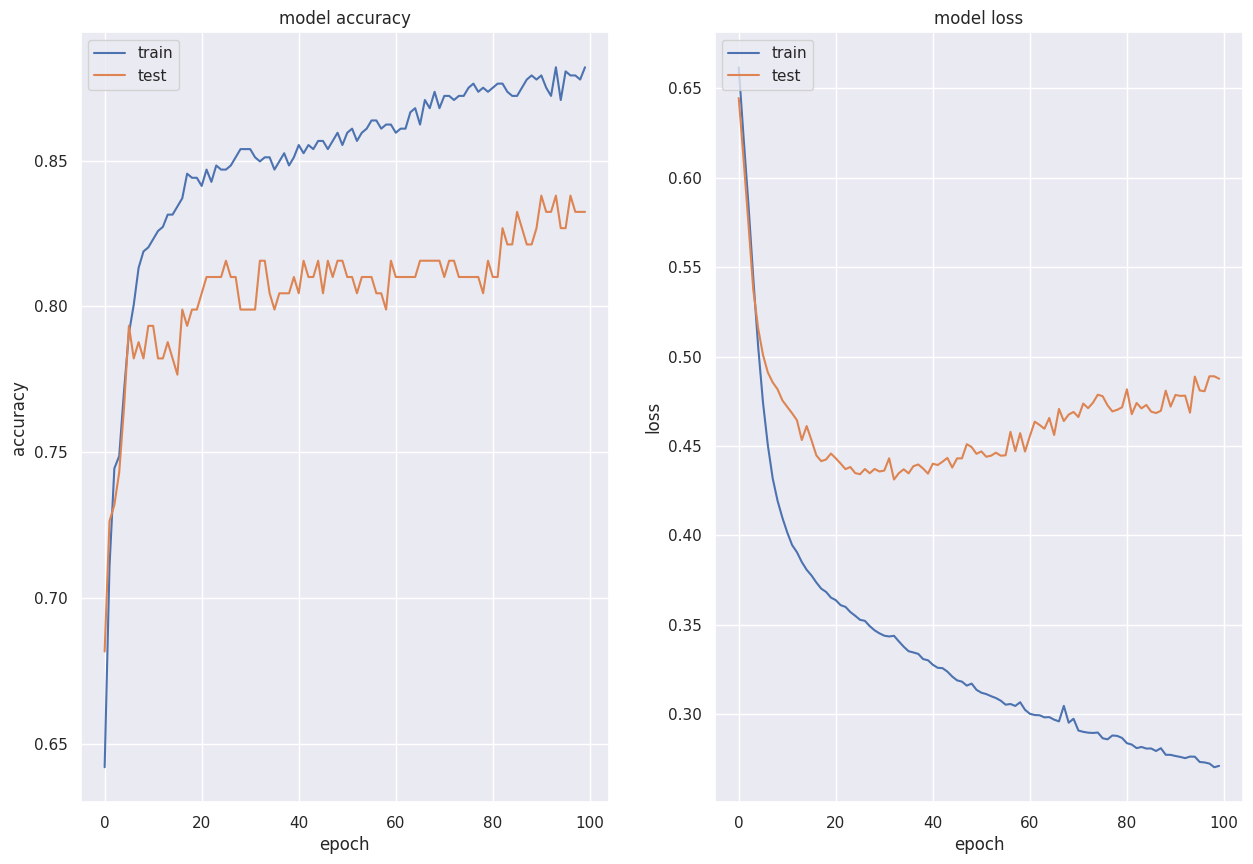

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Train AUC:  0.9536242041936803
Vali AUC:  0.8649538866930172


In [185]:
graf_model(train_history)
precision(model, True)

### Modelo Regularizado

In [186]:
#np.random.seed(0)

def func_model_reg():
    inp = Input(shape=(29,))

    x=Dropout(0.1)(inp)

    x=Dense(12, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(inp)
    x=Dropout(0.3)(x)

    x=Dense(12, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    x=Dropout(0.3)(x)

    x=Dense(14, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    x=Dropout(0.3)(x)

    x=Dense(12, activation="relu", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    x=Dropout(0.1)(x)

    x=Dense(1, activation="sigmoid", kernel_initializer='glorot_normal', bias_initializer='zeros')(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['binary_accuracy'])
    return model
model = func_model_reg()
print(model.summary())




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 14)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 12)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 891 (3.48 KB)

 Trainable params: 891 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

None


In [187]:
model1 = func_model_reg()
entrenadofinal = model1.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(val_dfX, val_dfY), verbose=0)

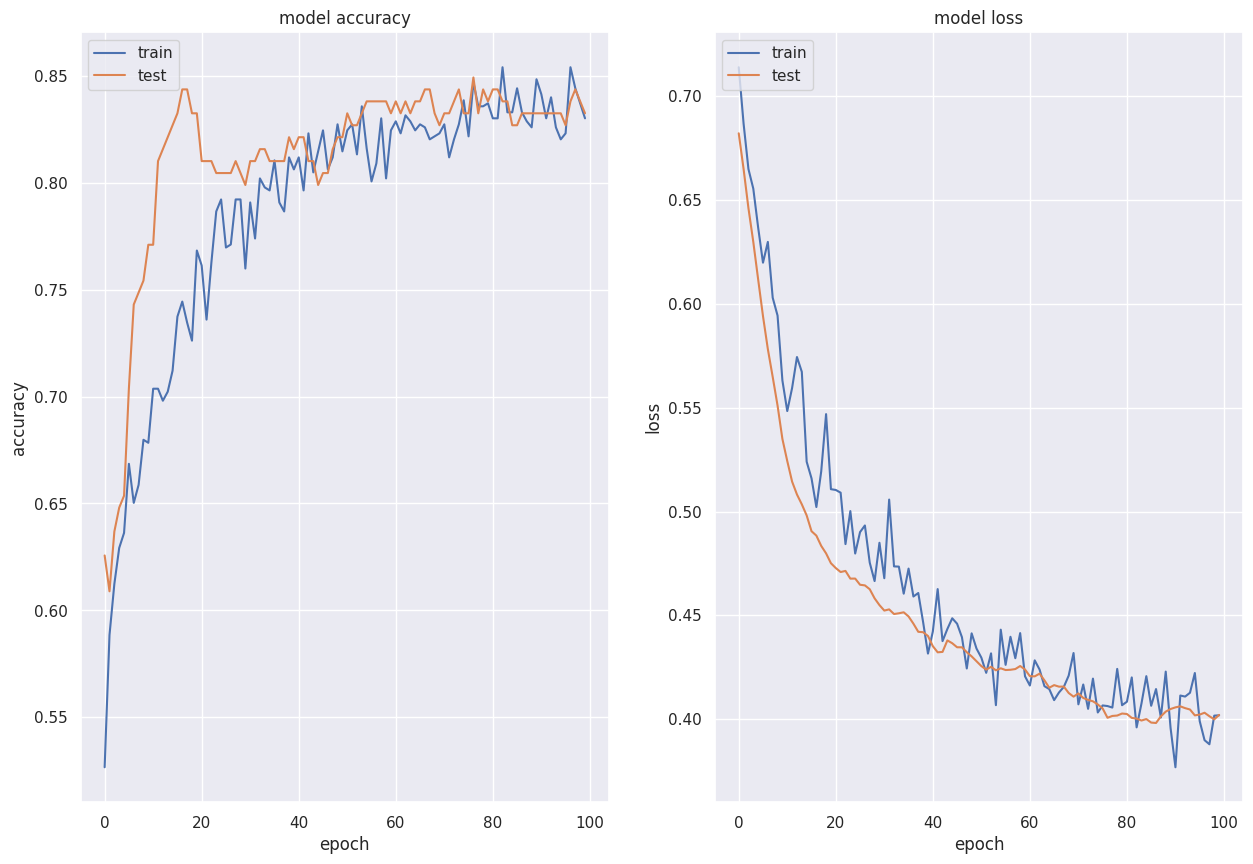

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train AUC:  0.9182123874606791
Vali AUC:  0.8595520421607378


In [188]:
graf_model(entrenadofinal)
precision(model1)

In [189]:
## Ver la prediccion de los datos

In [190]:
y_pred = model1.predict(X_test)
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

output = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_final})
output.to_csv('prediction.csv', index=False)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [191]:
pred = pd.read_csv('prediction.csv')
pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
